In [1]:
#load all packages
import tensorflow as tf
from tensorflow.keras import layers, models
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from keras import metrics
import keras.backend as K
from keras.utils import to_categorical, image_dataset_from_directory
import cv2
import glob
from tensorflow.python.client import device_lib



In [5]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#from tensorflow.python.client import device_lib 
#print(device_lib.list_local_devices())

In [2]:
train_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\train\\NonDemented\\*.jpg")]
train_images = np.concatenate([image[:,:,:,np.newaxis] for image in train_images],axis=3)
train_images = np.moveaxis(train_images,3,0)
train_images = train_images[:,:,:,0]
nonD_train_images = train_images[:,:,:,np.newaxis]


In [3]:
train_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\train\\VeryMildDemented\\*.jpg")]
train_images = np.concatenate([image[:,:,:,np.newaxis] for image in train_images],axis=3)
train_images = np.moveaxis(train_images,3,0)
train_images = train_images[:,:,:,0]
vmD_train_images = train_images[:,:,:,np.newaxis]


In [4]:
train_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\train\\MildDemented\\*.jpg")]
train_images = np.concatenate([image[:,:,:,np.newaxis] for image in train_images],axis=3)
train_images = np.moveaxis(train_images,3,0)
train_images = train_images[:,:,:,0]
mD_train_images = train_images[:,:,:,np.newaxis]

In [5]:
train_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\train\\ModerateDemented\\*.jpg")]
train_images = np.concatenate([image[:,:,:,np.newaxis] for image in train_images],axis=3)
train_images = np.moveaxis(train_images,3,0)
train_images = train_images[:,:,:,0]
MoD_train_images = train_images[:,:,:,np.newaxis]

In [6]:
test_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\test\\NonDemented\\*.jpg")]
test_images = np.concatenate([image[:,:,:,np.newaxis] for image in test_images],axis=3)
test_images = np.moveaxis(test_images,3,0)
test_images = test_images[:,:,:,0]
nonD_test_images = test_images[:,:,:,np.newaxis]


In [7]:
test_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\test\\VeryMildDemented\\*.jpg")]
test_images = np.concatenate([image[:,:,:,np.newaxis] for image in test_images],axis=3)
test_images = np.moveaxis(test_images,3,0)
test_images = test_images[:,:,:,0]
vmD_test_images = test_images[:,:,:,np.newaxis]

In [8]:
test_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\test\\MildDemented\\*.jpg")]
test_images = np.concatenate([image[:,:,:,np.newaxis] for image in test_images],axis=3)
test_images = np.moveaxis(test_images,3,0)
test_images = test_images[:,:,:,0]
mD_test_images = test_images[:,:,:,np.newaxis]

In [9]:
test_images = [cv2.imread(file) for file in glob.glob("F:\\MRI_class\\data\\Alzheimer_Dataset2\\test\\ModerateDemented\\*.jpg")]
test_images = np.concatenate([image[:,:,:,np.newaxis] for image in test_images],axis=3)
test_images = np.moveaxis(test_images,3,0)
test_images = test_images[:,:,:,0]
MoD_test_images = test_images[:,:,:,np.newaxis]

In [10]:
test_images = np.concatenate((nonD_test_images,vmD_test_images,mD_test_images,MoD_test_images),axis=0)

In [11]:
train_images = np.concatenate((nonD_train_images,vmD_train_images,mD_train_images,MoD_train_images),axis=0)

In [12]:
target_train = np.full((1,len(nonD_train_images)),0)
target_train = np.hstack((target_train,np.full((1,len(vmD_train_images)),1)))
target_train = np.hstack((target_train,np.full((1,len(mD_train_images)),2)))
target_train = np.hstack((target_train,np.full((1,len(MoD_train_images)),3)))
target_train = target_train.flatten()

In [13]:
target_test = np.full((1,len(nonD_test_images)),0)
target_test = np.hstack((target_test,np.full((1,len(vmD_test_images)),1)))
target_test = np.hstack((target_test,np.full((1,len(mD_test_images)),2)))
target_test = np.hstack((target_test,np.full((1,len(MoD_test_images)),3)))
target_test = target_test.flatten()

In [14]:
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)

In [15]:
X_train, y_train = shuffle(train_images, target_train, random_state=10)
X_test, y_test = shuffle(test_images, target_test, random_state=10)

In [16]:
y_train.shape

(5121, 4)

In [12]:
#create file list matching the path_list
t = pd.DataFrame(path_list)

#merge metadata dataframe with file list on ID
f = lambda x: x[0:13] #merge on first 13 letters (eg "OAS1_0001_MR1")
t["ID"]=t[0].apply(f)

metaData = pd.merge(metaData, t,on="ID", how="left")
metaData = metaData.rename(columns={0:"file"})

NameError: name 'x' is not defined

In [ ]:
metaData.head()

,ID,CDR,file
0,OAS1_0001_MR1,0.0,OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_t...
1,OAS1_0002_MR1,0.0,OAS1_0002_MR1_mpr_n4_anon_111_t88_masked_gfc_t...
2,OAS1_0003_MR1,0.5,OAS1_0003_MR1_mpr_n4_anon_111_t88_masked_gfc_t...
3,OAS1_0010_MR1,0.0,OAS1_0010_MR1_mpr_n4_anon_111_t88_masked_gfc_t...
4,OAS1_0011_MR1,0.0,OAS1_0011_MR1_mpr_n4_anon_111_t88_masked_gfc_t...


In [ ]:

X = metaData["file"]
y = metaData["CDR"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=10)

In [ ]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [ ]:
# replace to have only 0 and 1 in target
y_train.replace(2,3,inplace=True)
y_train.replace(1,2,inplace=True)
y_train.replace(0.5,1,inplace=True)
y_test.replace(2,3,inplace=True)
y_test.replace(1,2,inplace=True)
y_test.replace(0.5,1,inplace=True)

In [18]:
y_test = to_categorical(y_test, num_classes=4)
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
#train
#using X_train IDs to get the images and convert to 4D array

checker = 0
for t in range(0,len(X_train.file)):
    
    #iteration check
    if t+1 > len(X_train.file)-1:
        break
    
    #image1
    temp_path = path+"\\"+X_train.file[t]
    image1 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr1 = tf.keras.preprocessing.image.img_to_array(image1)
    input_arr1 = input_arr1[:,:,:,np.newaxis]
    
    #image2
    temp_path = path+"\\"+X_train.file[t+1]
    image2 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr2 = tf.keras.preprocessing.image.img_to_array(image2)
    input_arr2 = input_arr2[:,:,:,np.newaxis]

    #concatenate
    if t == 0:
        images = np.concatenate((input_arr1,input_arr2),axis = 3)
    
    if t > 0:
        images = np.concatenate((images,input_arr2),axis = 3)

    
images = np.moveaxis(images,3,0)
images_train = images


In [ ]:
images_train = images_train[:,:,:,0]
images_train = images_train[:,:,:,np.newaxis]

In [ ]:
for t in range(0,len(images_train)):
    images_train[t,:,:] = ((images_train[t,:,:] - np.mean(images_train[t,:,:])) /np.std(images_train[t,:,:]))

In [ ]:
#test
#using X_test IDs to get the images and convert to 4D array

checker = 0
for t in range(0,len(X_test.file)):
    
    #iteration check
    if t+1 > len(X_test.file)-1:
        break

    #image1
    temp_path = path+"\\"+X_test.file[t]
    image1 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr1 = tf.keras.preprocessing.image.img_to_array(image1)
    input_arr1 = input_arr1[:,:,:,np.newaxis]
    
    #image2
    temp_path = path+"\\"+X_test.file[t+1]
    image2 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr2 = tf.keras.preprocessing.image.img_to_array(image2)
    input_arr2 = input_arr2[:,:,:,np.newaxis]

    #concatenate
    if t == 0:
        images = np.concatenate((input_arr1,input_arr2),axis = 3)
    
    if t > 0:
        images = np.concatenate((images,input_arr2),axis = 3)

    
images = np.moveaxis(images,3,0)
images_test = images

In [ ]:
images_test = images_test[:,:,:,1]
images_test = images_test[:,:,:,np.newaxis]

In [ ]:
images_test.shape

(58, 208, 176, 1)

In [ ]:
for t in range(0,len(images_test)):
    images_test[t,:,:] = ((images_test[t,:,:] - np.mean(images_test[t,:,:])) /np.std(images_test[t,:,:]))

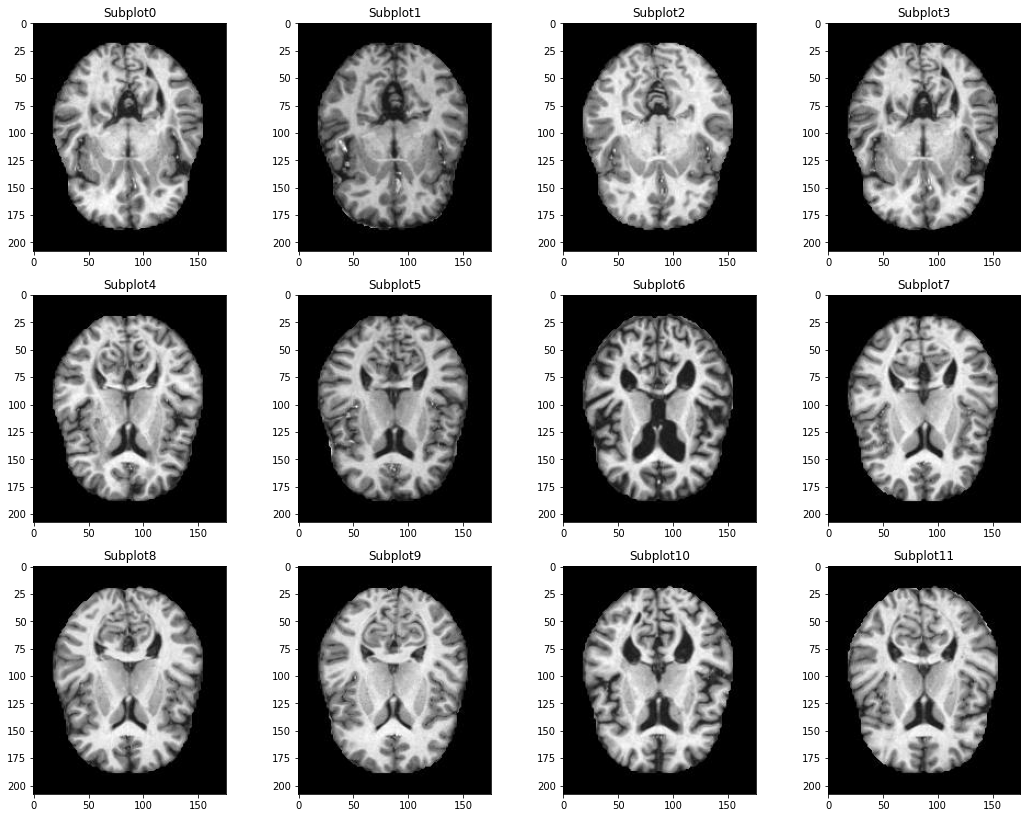

In [17]:
#visualization of couple brains
cols= 4
rows = 4
axes = []
width = 1000
height = 1000

fig = plt.figure(figsize=(15, 15))

for a in range(0,12):
    b = train_images[a].astype('uint8')
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b,cmap="gray")
fig.tight_layout()
plt.show()

In [18]:
#iniziating model architecture
model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(208, 176, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))

In [19]:
#add dense layes to conv layers
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(4, activation="softmax"))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 50)      500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 50)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 50)       22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 50)        22550     
                                                                 
 flatten (Flatten)           (None, 96000)             0

In [21]:
EPOCHS = 15
BATCH_SIZE = 200
STEPS_PER_EPOCH = len(train_images) // BATCH_SIZE


In [22]:
#function from the WEB. Just to be able to print F1 score since it is not available in keras metrics

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [25]:
#compiling the model architecture and start fit
keras.backend.clear_session()
model.compile(optimizer='adam',
              loss="CategoricalCrossentropy",
              #loss="binary_crossentropy",
              metrics=['accuracy',
              
              metrics.Precision(), metrics.Recall(), get_f1])

#with tf.device("/gpu:0"):
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    shuffle=True,
                    validation_split=0.30)
                    

Epoch 1/15


: 

: 

40/40 - 4s - loss: 2.3367 - accuracy: 0.5598 - precision: 0.5611 - recall: 0.5567 - get_f1: 0.5588 - 4s/epoch - 109ms/step


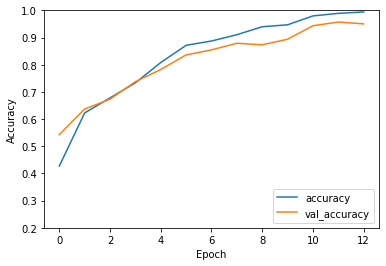

In [95]:
#print val vs accuracy

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc, z,z1,z2  = model.evaluate(X_test,  y_test, verbose=2)

In [192]:
y_pred = model.predict(X_test)

40/40 [==============================] - 4s 110ms/step


In [193]:
#t=np.where(np.argmax(y_pred[0,:]), 1, 0)
y_pred[np.arange(len(y_pred)), y_pred.argmax(1)] = 1
x = np.argwhere(y_pred==1)
z = x[:,1]

In [195]:
xt = np.argwhere(y_test==1)
zt = xt[:,1]

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [203]:
f1_score(zt,z,average="weighted")

0.5284195193743318

In [ ]:
# get specific layer output - TAKES some time. Layer 7 is the output layer
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[7].output])
layer_output = get_layer_output([images_train])[0]

In [ ]:
for i in layer_output:
    #if np.argmax(i) != 0:
    print(np.argmax(i))

0
0
0
0
1
2
0
0
1
0
0
1
0
0
1
0
0
0
0
2
0
0
0
0
1
0
0
0
1
3
0
1
1
2
1
0
0
1
1
1
2
0
2
1
0
1
0
1
1
1
1
0
0
2
2
0
1
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
1
0
2
1
2
0
0
1
1
0
0
2
0
1
0
0
0
2
0
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
3
1
0
1
0
1
0
2
0
2
0
1
0
1
0
0
0
2
2
0
1
0
0
0
2
1
0
0
0
2
2
1
0
0
0
2
1
0
0
1
0
1
0
1
1
0
0
0
2
0
1
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0


In [ ]:
history

In [204]:
!mkdir -p saved_model2
model.save("saved_model/model2")

Ein Unterverzeichnis oder eine Datei mit dem Namen "-p" existiert bereits.
Folgender Fehler trat auf: -p.


INFO:tensorflow:Assets written to: saved_model/model2\assets


INFO:tensorflow:Assets written to: saved_model/model2\assets
